In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

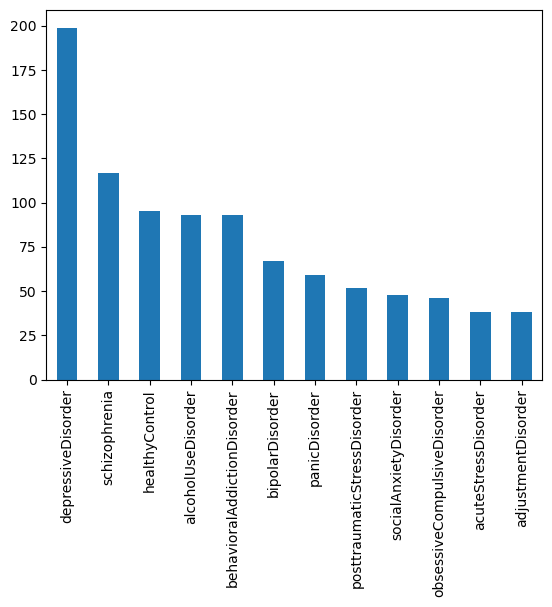

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

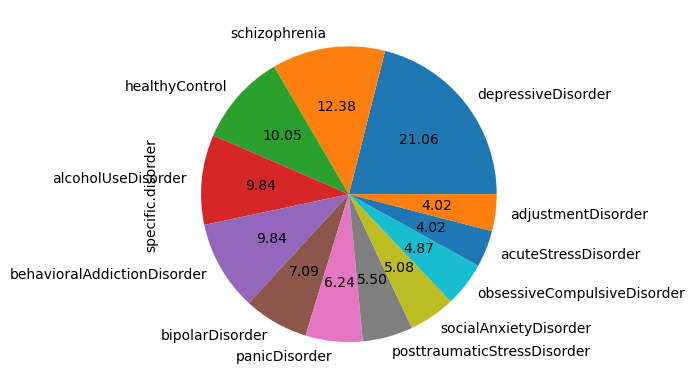

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':0, 
    'adjustmentDisorder':1, 
    'alcoholUseDisorder':2,
    'behavioralAddictionDisorder':3, 
    'bipolarDisorder':4,
    'depressiveDisorder':5, 
    'healthyControl':6,
    'obsessiveCompulsiveDisorder':7, 
    'panicDisorder':8,
    'posttraumaticStressDisorder':9, 
    'schizophrenia':10,
    'socialAnxietyDisorder':11
})

In [11]:
# Observing how the specific disorder column data has been converted to integers
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,0,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,0,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,0,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,0,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,0,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,11,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,11,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,11,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,11,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<Axes: >

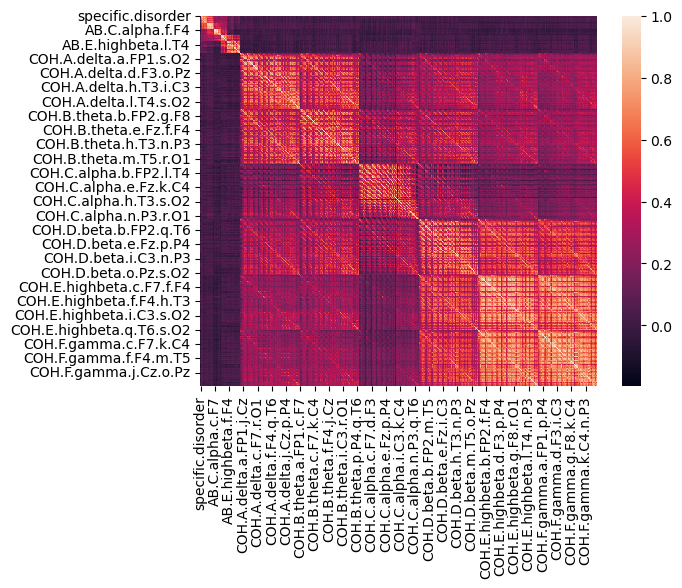

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Handling Imbalanced Dataset
# SMOTE (Synthetic Minority Oversampling Technique) will be used as it helps with oversampling the examples
# in the minority class.

# Select random data from the minority class.
# Calculate the Euclidean distance between the random data and its k nearest neighbors.
# Multiply the difference with a random number between 0 and 1. Then, add the result to the minority class as a synthetic sample.
# Repeat the procedure until the expected proportion of minority class is met.

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
xSmote, ySmote = resample.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xSmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 20.8 MB


In [17]:
# Prints information about the EEG true smote dataset.
ySmote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2388 entries, 0 to 2387
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
2388 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xSmote.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (2388, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', ySmote.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (2388,)


<Axes: >

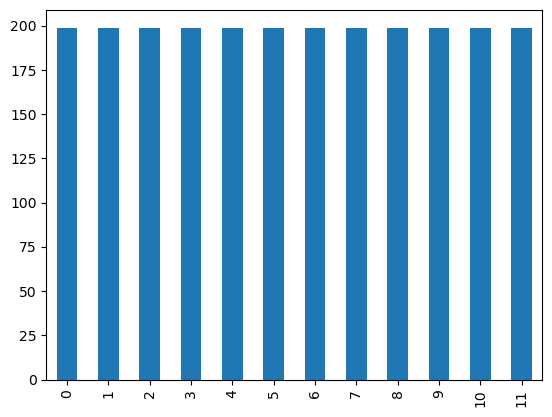

In [20]:
# Creating a visual plot to observe the y values after smote applied.
ySmote.value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

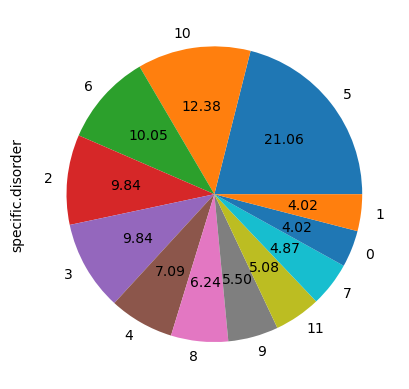

In [21]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xSmote, ySmote, test_size=0.3, random_state=42)

In [23]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define hyperparameters
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    # Create and train the model
    xgbbst = xgb.XGBClassifier(**param)
    xgbbst.fit(X_train, y_train)

    # Evaluate the model
    y_pred = xgbbst.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [24]:
# Creating and running our optimization
import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-08-24 13:48:47,102] A new study created in memory with name: no-name-a39b917a-3b57-411d-8ad1-b73501313123
[I 2023-08-24 13:49:09,866] Trial 0 finished with value: 0.7880055788005579 and parameters: {'booster': 'gblinear', 'lambda': 0.0001751393682348949, 'alpha': 6.489723910925059e-05, 'subsample': 0.652808221823417, 'colsample_bytree': 0.5341060668111038}. Best is trial 0 with value: 0.7880055788005579.
[I 2023-08-24 13:51:19,591] Trial 1 finished with value: 0.4811715481171548 and parameters: {'booster': 'dart', 'lambda': 0.3352829678679451, 'alpha': 0.0013881601106335755, 'subsample': 0.674538487647466, 'colsample_bytree': 0.8678931661960316, 'max_depth': 3, 'min_child_weight': 5, 'eta': 1.0480353247421668e-05, 'gamma': 0.002285718720940939, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.013448032543399144, 'skip_drop': 4.0675388902948144e-07}. Best is trial 1 with value: 0.4811715481171548.
[I 2023-08-24 13:51:24,141] Trial

[I 2023-08-24 14:03:56,489] Trial 22 finished with value: 0.14086471408647142 and parameters: {'booster': 'gblinear', 'lambda': 9.19451518126984e-08, 'alpha': 0.9618380805928058, 'subsample': 0.7917607718263009, 'colsample_bytree': 0.3808739088994235}. Best is trial 11 with value: 0.1394700139470014.
[I 2023-08-24 14:04:13,709] Trial 23 finished with value: 0.5509065550906556 and parameters: {'booster': 'gblinear', 'lambda': 7.071515228508926e-08, 'alpha': 0.08415613498512496, 'subsample': 0.8209813771027655, 'colsample_bytree': 0.48754600584251306}. Best is trial 11 with value: 0.1394700139470014.
[I 2023-08-24 14:04:17,024] Trial 24 finished with value: 0.1394700139470014 and parameters: {'booster': 'gblinear', 'lambda': 1.0890888799302861e-08, 'alpha': 0.984846514678487, 'subsample': 0.5947001996262741, 'colsample_bytree': 0.3864393389711696}. Best is trial 11 with value: 0.1394700139470014.
[I 2023-08-24 14:04:33,181] Trial 25 finished with value: 0.45327754532775455 and parameters

In [25]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'booster': 'gblinear', 'lambda': 1.0092296510348907e-08, 'alpha': 0.9857741819828625, 'subsample': 0.4950949871603788, 'colsample_bytree': 0.9844779823088868}
Best RMSE: 0.1394700139470014


In [35]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(lamda=1.01, alpha=0.99, subsample=0.5, colsample_bytree=0.98,random_state=42)


In [36]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
xgb_model.fit(X_train, y_train)

[14:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "lamda" } are not used.



XGBClassifier(alpha=0.99, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.98, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lamda=1.01, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
xgb_model.score(X_test, y_test)

0.7894002789400278

In [38]:
# With the model accuracy tested I want to make an actual prediction with the method below.
xgb_model.predict(X_test)

array([10,  8,  4, 11,  9,  6,  4,  9,  0,  5,  3,  7, 10,  7,  6,  2,  4,
        7,  1,  0,  7,  8,  0,  9,  1,  5,  4,  7,  2,  5,  9,  1,  4,  4,
        7,  9,  2,  1, 10,  9,  9,  6, 10, 11,  7,  5,  2,  5,  9,  4, 10,
        9,  2,  7,  0, 11,  8,  6,  5,  8,  3,  3,  1,  0,  6,  1,  8,  1,
        1,  2,  2,  2, 11, 10,  3,  2,  8,  1,  7, 11,  1, 11,  1, 10,  3,
        4,  6,  0,  2, 11, 10,  3,  3,  9,  8,  3, 10, 10, 10,  0,  5,  8,
        3,  7,  3,  9, 11,  6, 10,  7,  3,  1,  1,  8,  3,  5,  7,  7,  9,
        3, 11,  7,  5,  8,  4, 11,  6,  8,  3,  5,  2,  4, 10, 10,  4,  2,
        2,  6,  3,  0,  5, 11, 11,  3,  7, 11,  7,  2,  6,  1, 11,  2,  8,
        1, 11,  7, 10,  5,  0,  3,  9,  0,  9,  6, 11,  8,  7, 11,  6,  8,
        5,  5,  3,  8,  4,  7,  5,  5,  1, 11,  7,  1,  1, 11,  7,  2,  6,
        2,  4,  0,  1,  6,  4,  1, 10, 10,  0,  4,  3,  0,  2,  7,  9,  8,
        9,  7,  3,  4,  1, 10,  1,  1,  6,  4,  9,  2,  2,  0,  9, 10,  3,
        3,  3,  8,  8, 10

In [39]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = xgb_model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[57,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 2,  0, 43,  2,  0,  4,  2,  0,  0,  1,  2,  1],
       [ 3,  1,  2, 56,  1,  4,  3,  0,  0,  0,  1,  4],
       [ 0,  2,  2,  0, 50,  5,  1,  0,  0,  0,  0,  0],
       [ 0,  3,  8,  5,  6, 17,  6,  0,  7,  4,  7,  3],
       [ 1,  2,  1,  1,  0,  5, 41,  1,  3,  1,  3,  0],
       [ 0,  0,  2,  0,  0,  2,  0, 57,  1,  2,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 48,  0,  2,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0, 51,  0,  0],
       [ 2,  1,  1,  3,  1,  5,  0,  1,  3,  3, 40,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1,  0,  0, 48]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

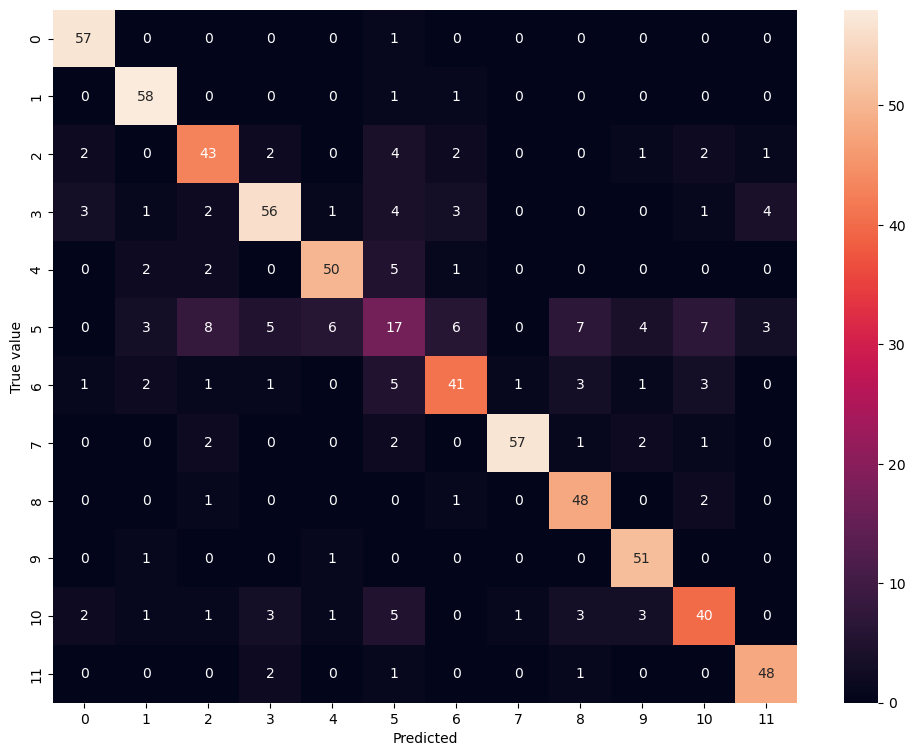

In [40]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (2,5) & (8,5) with 8/7 incorrect classifications represents how alcohol use and panic with depressive disorders were mis classes often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [41]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        58
           1       0.85      0.97      0.91        60
           2       0.72      0.75      0.74        57
           3       0.81      0.75      0.78        75
           4       0.85      0.83      0.84        60
           5       0.38      0.26      0.31        66
           6       0.75      0.69      0.72        59
           7       0.97      0.88      0.92        65
           8       0.76      0.92      0.83        52
           9       0.82      0.96      0.89        53
          10       0.71      0.67      0.69        60
          11       0.86      0.92      0.89        52

    accuracy                           0.79       717
   macro avg       0.78      0.80      0.79       717
weighted avg       0.78      0.79      0.78       717



In [42]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

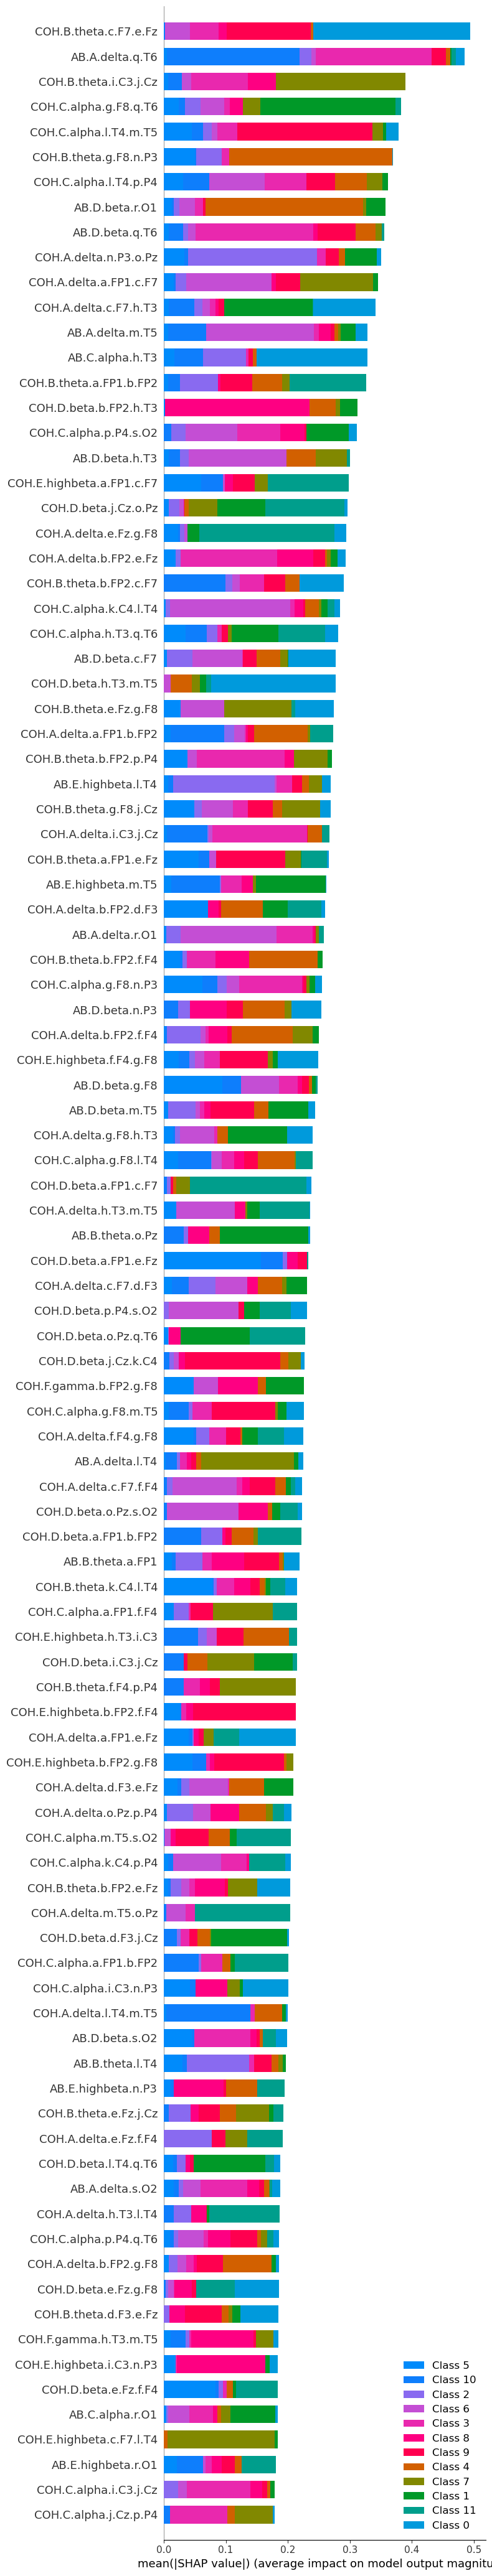

In [43]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [44]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
321,COH.B.theta.c.F7.e.Fz,29.539171
16,AB.A.delta.q.T6,28.959492
401,COH.B.theta.i.C3.j.Cz,23.248781
558,COH.C.alpha.g.F8.q.T6,22.851921
599,COH.C.alpha.l.T4.m.T5,22.640219
...,...,...
847,COH.E.highbeta.c.F7.r.O1,0.000000
890,COH.E.highbeta.f.F4.s.O2,0.000000
889,COH.E.highbeta.f.F4.r.O1,0.000000
888,COH.E.highbeta.f.F4.q.T6,0.000000


In [45]:
# Below I am retrieving the 10 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['COH.B.theta.c.F7.e.Fz',
 'AB.A.delta.q.T6',
 'COH.B.theta.i.C3.j.Cz',
 'COH.C.alpha.g.F8.q.T6',
 'COH.C.alpha.l.T4.m.T5',
 'COH.B.theta.g.F8.n.P3',
 'COH.C.alpha.l.T4.p.P4',
 'AB.D.beta.r.O1',
 'AB.D.beta.q.T6',
 'COH.A.delta.n.P3.o.Pz']

In [46]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,COH.B.theta.c.F7.e.Fz,AB.A.delta.q.T6,COH.B.theta.i.C3.j.Cz,COH.C.alpha.g.F8.q.T6,COH.C.alpha.l.T4.m.T5,COH.B.theta.g.F8.n.P3,COH.C.alpha.l.T4.p.P4,AB.D.beta.r.O1,AB.D.beta.q.T6,COH.A.delta.n.P3.o.Pz
0,51.435759,11.691533,72.614649,19.540393,12.175660,15.381007,25.948707,18.690871,10.977550,31.406563
1,65.744154,12.962885,92.535749,16.509707,3.819884,13.838436,36.338418,43.236774,24.480477,42.965825
2,70.215205,8.674228,78.796130,6.964353,0.668130,7.976506,29.967558,13.025842,12.876204,44.720665
3,52.716439,27.811259,48.023551,21.524375,36.279940,11.053364,66.952340,30.601081,27.561668,52.363971
4,47.169607,5.262199,82.781259,22.738287,2.172658,24.101797,56.099601,6.841598,2.648415,12.507506
...,...,...,...,...,...,...,...,...,...,...
940,21.325542,9.114000,78.757027,19.094883,14.239692,40.078132,43.484046,36.203481,21.745380,79.018011
941,74.070820,18.950095,88.885366,24.969558,17.151953,30.935332,99.765239,6.604095,11.121046,92.862865
942,99.808586,12.392778,83.692074,40.807412,46.832841,0.428387,52.624526,7.667246,7.367747,70.389210
943,61.735219,8.462857,88.964797,31.843191,17.591222,17.711074,26.253417,8.098550,7.386604,32.822905


In [47]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [49]:
import xgboost as xgb

model = xgb.XGBClassifier(lamda=1.01, alpha=0.99, subsample=0.5, colsample_bytree=0.98,random_state=42)

In [50]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

[14:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "lamda" } are not used.



XGBClassifier(alpha=0.99, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.98, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lamda=1.01, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None, ...)

In [51]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.1936619718309859

In [52]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([ 4,  2,  2, 10,  5,  4,  5,  5, 10, 10, 11,  5,  8,  2,  3,  6,  7,
        5, 10,  6, 10,  2,  0,  5,  3, 10,  3,  3,  3,  3,  2,  5,  5,  5,
        5,  6,  8,  0,  5,  3,  5,  5,  3,  8,  1, 10, 10,  5,  3,  6,  5,
        4,  3,  5,  9,  5,  5,  3, 10,  5,  5,  7, 10,  5,  9,  2,  3,  3,
       10,  5,  7,  5,  6,  6,  2, 10,  6, 11,  5,  9,  5,  6,  3, 10,  3,
        5,  3,  6, 10,  5,  5,  5, 10,  5, 10,  2,  2,  5,  5,  2,  8,  3,
       10,  5, 11,  6,  5,  5, 10,  9,  8,  5,  4,  5,  2, 10, 10, 10,  3,
       10,  9,  3,  2, 11,  6,  2,  5,  3,  5,  2,  2,  3, 11,  5, 10,  3,
        5,  7,  6,  5,  6, 11,  3, 10,  5,  2,  5,  9,  5,  2,  4,  7,  6,
        6,  7,  9, 10, 10, 10,  8,  2,  1,  2,  1,  5,  5, 10,  5, 10, 10,
        5,  9,  9,  3, 10,  6,  4,  3,  5,  5,  2,  5,  2,  6,  4,  6, 10,
        5,  7,  4,  4, 10,  5,  3,  5,  6,  2,  1,  3,  5, 10,  5,  5,  9,
        2, 10,  6,  5,  4, 10,  5,  2,  8,  5, 10,  5,  8,  5,  5, 10, 10,
       10,  7,  4,  2,  3

In [53]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  2,  1,  1,  4,  1,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  1,  0,  5,  2,  0,  2,  0,  2,  0],
       [ 1,  1,  3,  2,  1,  7,  1,  4,  2,  1,  2,  0],
       [ 0,  2,  3,  6,  1, 10,  2,  0,  1,  0,  1,  0],
       [ 0,  1,  6,  4,  5,  7,  0,  0,  0,  1,  2,  2],
       [ 0,  0,  5,  9,  5, 22,  7,  1,  1,  1,  8,  2],
       [ 0,  1,  1,  3,  0,  6,  6,  3,  2,  2,  6,  1],
       [ 0,  0,  0,  2,  0,  2,  2,  2,  0,  0,  3,  1],
       [ 0,  0,  4,  1,  0,  2,  2,  0,  0,  2,  8,  0],
       [ 0,  0,  1,  0,  0,  4,  2,  1,  0,  2,  1,  0],
       [ 0,  0,  4,  2,  1,  7,  4,  1,  1,  3,  9,  2],
       [ 0,  0,  1,  5,  0,  3,  0,  0,  1,  0,  4,  0]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

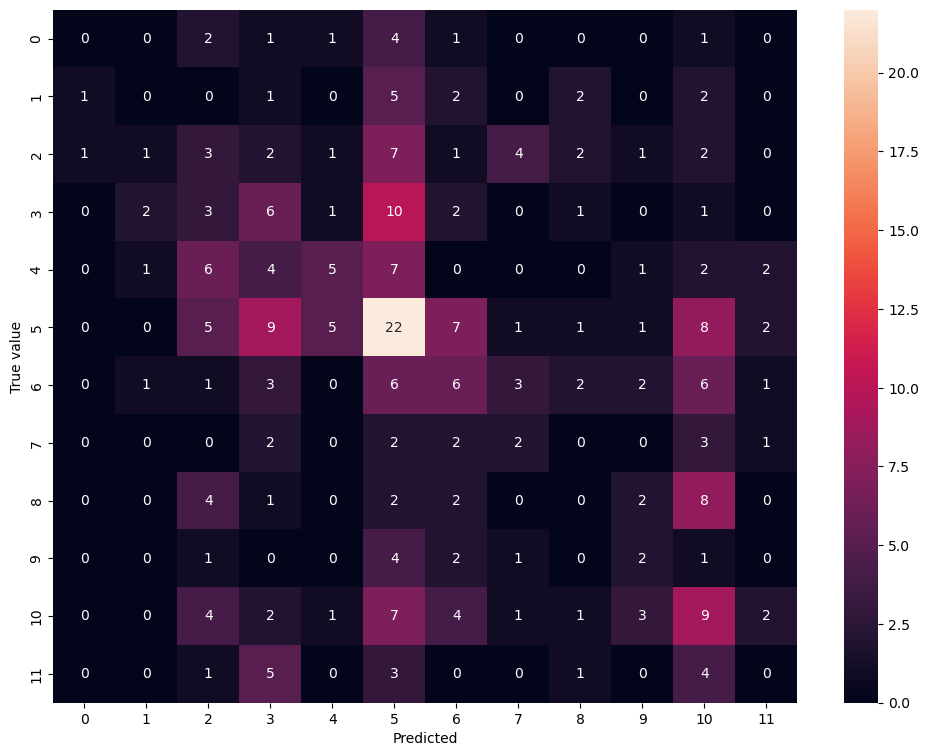

In [54]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,3) & (3,5) with 10/9 incorrect classifications represents how behavioural with depressive disorders were mis classes often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [55]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        13
           2       0.10      0.12      0.11        25
           3       0.17      0.23      0.19        26
           4       0.36      0.18      0.24        28
           5       0.28      0.36      0.31        61
           6       0.21      0.19      0.20        31
           7       0.17      0.17      0.17        12
           8       0.00      0.00      0.00        19
           9       0.17      0.18      0.17        11
          10       0.19      0.26      0.22        34
          11       0.00      0.00      0.00        14

    accuracy                           0.19       284
   macro avg       0.14      0.14      0.13       284
weighted avg       0.18      0.19      0.18       284



In [56]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html
# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html